In [ ]:
#https://cs.stanford.edu/people/karpathy/convnetjs/demo/cifar10.html
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


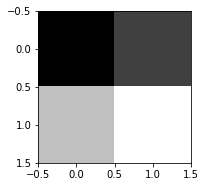

In [3]:
print("image.shape", image.shape)
weight=tf.constant([[[[1.]],[[1.]]],
                    [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d=tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='VALID')
#hmm why does it set strides to 1 1 1 1 ??? what does it mean?
conv2d_img=conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

#this is show what is result.
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')
    
    

In [ ]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

In [ ]:
print("image.shape",image.shape)
weight=tf.constant([[[[1.0,  10.0, -1.0]],[[1.0,  10.0, -1.0]]],
                    [[[1.0,  10.0, -1.0]],[[1.0,  10.0, -1.0]]]])
print("weight.shape",weight.shape)
conv2d= tf.nn.conv2d(image, weight, strides=[1,1,1,1],padding='SAME')
conv2d_img=conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

In [ ]:
imgae=np.array([[[[4],[3]],
                [[2],[1]]]],dtype=np.float32)
pool=tf.nn.max_pool(image, ksize=[1, 2, 2, 1], 
                   strides=[1,1,1,1],padding='VALID')
print(pool.shape)
print(pool.eval())

In [ ]:

image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())


In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

In [ ]:
sess=tf.InteractiveSession()

img=img.reshape(-1,28,28,1)
W1=tf.Variable(tf.random_normal([3,3,1,5],stddev=0.01))
conv2d=tf.nn.conv2d(img,W1,strides=[1,2,2,1], padding='SAME')
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')    

In [ ]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[
                        1, 2, 2, 1], padding='SAME')
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')
    

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


learning_rate = 0.001
training_epochs = 15
batch_size = 100

X=tf.placeholder(tf.float32,[None, 784])
X_img=tf.reshape(X,[-1,28,28,1])
Y=tf.placeholder(tf.float32,[None,10])

W1=tf.Variable(tf.random_normal([3,3,1,32],stddev=0.001))
L1=tf.nn.conv2d(X_img,W1,strides=[1,1,1,1],padding='SAME')
L1=tf.nn.relu(L1)
L1=tf.nn.max_pool(L1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')


W2=tf.Variable(tf.random_normal([3,3,32,64],stddev=0.001))
L2=tf.nn.conv2d(L1,W2,strides=[1,1,1,1],padding='SAME')
L2=tf.nn.relu(L2)
L2=tf.nn.max_pool(L2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
L2=tf.reshape(L2,[-1,7*7*64])
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10],initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits=tf.matmul(L2,W3)+b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


learning_rate = 0.001
training_epochs = 15
batch_size = 100

keep_prob = tf.placeholder(tf.float32)

X=tf.placeholder(tf.float32,[None, 784])
X_img=tf.reshape(X,[-1,28,28,1])
Y=tf.placeholder(tf.float32,[None,10])

W1=tf.Variable(tf.random_normal([3,3,1,32],stddev=0.001))
L1=tf.nn.conv2d(X_img,W1,strides=[1,1,1,1],padding='SAME')
L1=tf.nn.relu(L1)
L1=tf.nn.max_pool(L1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
L1=tf.nn.dropout(L1,keep_prob=keep_prob)


W2=tf.Variable(tf.random_normal([3,3,32,64],stddev=0.001))
L2=tf.nn.conv2d(L1,W2,strides=[1,1,1,1],padding='SAME')
L2=tf.nn.relu(L2)
L2=tf.nn.max_pool(L2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
L2=tf.nn.dropout(L2,keep_prob=keep_prob)

W3=tf.Variable(tf.random_normal([3,3,64,128],stddev=0.001))
L3=tf.nn.conv2d(L2,W3,strides=[1,1,1,1],padding='SAME')
L3=tf.nn.relu(L3)
L3=tf.nn.max_pool(L3,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
L3=tf.reshape(L3,[-1,4*4*128])
L3=tf.nn.dropout(L3,keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[4 * 4 * 128, 625],initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4=tf.nn.relu(tf.matmul(L3,W4)+b4)
L4=tf.nn.dropout(L4,keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[625, 10],initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits=tf.matmul(L4,W5)+b5





cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys,keep_prob:0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels,keep_prob:1}))

In [ ]:
print(logits)

In [ ]:
print(L2)

In [ ]:
a=mnist.count

In [ ]:
mnist.train.

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)


In [ ]:
mnist.train.

In [ ]:
m

In [ ]:
label=mnist.train.labels[mnist.train.labels<=1].reshape(-1,1)

In [ ]:
data=mnist.train.images[mnist.train.labels<=1]

In [ ]:
label.shape

In [ ]:
d=np.append(data,label,1)

In [ ]:
d.shape

In [ ]:
import tensorflow as tf
import numpy as np
from skimage import data, io, filters
from mlxtend.preprocessing import one_hot
import matplotlib.pyplot as plt
import random

# set train data path
train_data_path = 'data/out.txt'
class DataRead:
    def __init__(self, data_path,batch_size,prepro=True,pro_data=0):
        self.data_path=data_path
        self.batch_size = batch_size
        self.batch_num = 0
        
        #data read & preprocessing
        if(prepro):
            #data read
            with open(train_data_path) as f:
                data=f.readlines()
                
            #data preprocessing
            a=np.arange(np.size(data))
            a=a[a%2!=0]
            tmp=[data[i] for i in a]
            train_string=[d.split(",")[:] for d in tmp]
            for i in range(np.size(train_string,0)):
                train_string[i][-1]=float(train_string[i][-1]=='t\n')
            train=np.array([[float(d) for d in line ]for line in train_string])
        else:
            train=pro_data
        
        #total_batch
        self.total_batch = int(np.floor(np.size(train,0) / self.batch_size))
        
        # shuffle
        ind_shuff=np.arange(np.size(train,0))
        random.shuffle(ind_shuff)
        train=train[ind_shuff,:]
        
        self.train=train[:,:-1]
        self.label=train[:,-1].reshape(-1,1)
        
    def Next_Batch(self):
        batch_num = int(self.batch_num)
        batch_size = int(self.batch_size)
        
        data=self.train[batch_num * batch_size:(batch_num + 1) * batch_size,:]
        label=self.label[batch_num * batch_size:(batch_num + 1) * batch_size]
        
        self.batch_num = self.batch_num + 1
        if self.batch_num > self.total_batch:
            self.batch_num = 0
        return (data , label)

In [ ]:
train=DataRead(train_data_path,40,False,d)

In [ ]:
train.

In [ ]:
train.label.shape

In [ ]:
nb_classes = 1
learning_rate = 0.001
training_epochs = 45

In [ ]:

keep_prob = tf.placeholder(tf.float32)

X=tf.placeholder(tf.float32,[None, 784])
X_img=tf.reshape(X,[-1,28,28,1])
Y=tf.placeholder(tf.float32,[None,nb_classes])

In [ ]:

W1=tf.Variable(tf.random_normal([3,3,1,32],stddev=0.001))
L1=tf.nn.conv2d(X_img,W1,strides=[1,1,1,1],padding='SAME')
L1=tf.nn.relu(L1)
L1=tf.nn.max_pool(L1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
L1=tf.nn.dropout(L1,keep_prob=keep_prob)


W2=tf.Variable(tf.random_normal([3,3,32,64],stddev=0.001))
L2=tf.nn.conv2d(L1,W2,strides=[1,1,1,1],padding='SAME')
L2=tf.nn.relu(L2)
L2=tf.nn.max_pool(L2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')
L2=tf.nn.dropout(L2,keep_prob=keep_prob)

W3=tf.Variable(tf.random_normal([3,3,64,128],stddev=0.001))
L3=tf.nn.conv2d(L2,W3,strides=[1,1,1,1],padding='SAME')
L3=tf.nn.relu(L3)
L3=tf.nn.max_pool(L3,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

L3=tf.reshape(L3,[-1,4*4*128])
L3=tf.nn.dropout(L3,keep_prob=keep_prob)

W4 = tf.get_variable("W4", shape=[4 * 4 * 128, 625],initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4=tf.nn.relu(tf.matmul(L3,W4)+b4)
L4=tf.nn.dropout(L4,keep_prob=keep_prob)

W5 = tf.get_variable("W5", shape=[625, 1],initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([1]))
logits=tf.matmul(L4,W5)+b5


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch =  train.total_batch

    for i in range(total_batch):
        batch_xs, batch_ys = train.Next_Batch()
        feed_dict = {X: batch_xs, Y: batch_ys,keep_prob:0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

In [ ]:
np.size(label[label==0])

In [ ]:
label

In [ ]:
class park:
    def __init__(self,k,d):
    self.k=k
    self.d=d
    
class family(park):
    par
    

In [ ]:
#!/usr/bin/env python

import os
import scipy as scp
import scipy.misc

import numpy as np
import logging
import tensorflow as tf
import sys
from math import ceil

from tensorflow.python.framework import ops

img1 = scp.misc.imread("../Semantic_segmentation/FCN/tensorflow-fcn-master/test_data/tabby_cat.png")


In [183]:
import os
import logging
from math import ceil
import sys

import numpy as np
import tensorflow as tf

VGG_MEAN = [103.939, 116.779, 123.68]
images = tf.placeholder("float")
feed_dict = {images: img1}
batch_images = tf.expand_dims(images, 0)
X=batch_images

W1_1=tf.Variable(tf.random_normal([3,3,3,64],stddev=0.001))
L1_1=tf.nn.conv2d(X,W1_1,strides=[1,1,1,1],padding='SAME')
b1_1 = tf.Variable(tf.random_normal([64]))
L1_1 = tf.nn.bias_add(L1_1, b1_1)
L1_1=tf.nn.relu(L1_1)

W1_2=tf.Variable(tf.random_normal([3,3,64,64],stddev=0.001))
L1_2=tf.nn.conv2d(L1_1,W1_2,strides=[1,1,1,1],padding='SAME')
b1_2 = tf.Variable(tf.random_normal([64]))
L1_2 = tf.nn.bias_add(L1_2, b1_2)
L1_2=tf.nn.relu(L1_2)# (?, 368, 489, 64)
L1=tf.nn.max_pool(L1_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME') #(?, 185, 245, 64)
#--------------------------------------------------------------------------------------------------------------
W2_1=tf.Variable(tf.random_normal([3,3,64,128],stddev=0.001))
L2_1=tf.nn.conv2d(L1,W2_1,strides=[1,1,1,1],padding='SAME')
b2_1 = tf.Variable(tf.random_normal([128]))
L2_1 = tf.nn.bias_add(L2_1, b2_1)
L2_1=tf.nn.relu(L2_1)

W2_2=tf.Variable(tf.random_normal([3,3,128,128],stddev=0.001))
L2_2=tf.nn.conv2d(L2_1,W2_2,strides=[1,1,1,1],padding='SAME')
b2_2 = tf.Variable(tf.random_normal([128]))
L2_2 = tf.nn.bias_add(L2_2, b2_2)
L2_2=tf.nn.relu(L2_2)# (?, 185, 245, 128)
L2=tf.nn.max_pool(L2_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME') #(?, 92, 123, 128)

#--------------------------------------------------------------------------------------------------------------
W3_1=tf.Variable(tf.random_normal([3,3,128,256],stddev=0.001))
L3_1=tf.nn.conv2d(L2,W3_1,strides=[1,1,1,1],padding='SAME')
b3_1 = tf.Variable(tf.random_normal([256]))
L3_1 = tf.nn.bias_add(L3_1, b3_1)
L3_1=tf.nn.relu(L3_1)

W3_2=tf.Variable(tf.random_normal([3,3,256,256],stddev=0.001))
L3_2=tf.nn.conv2d(L3_1,W3_2,strides=[1,1,1,1],padding='SAME')
b3_2 = tf.Variable(tf.random_normal([256]))
L3_2 = tf.nn.bias_add(L3_2, b3_2)
L3_2=tf.nn.relu(L3_2)# (?, 92, 123, 256)
L3=tf.nn.max_pool(L3_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME') #(?, 46, 62, 256)

#--------------------------------------------------------------------------------------------------------------
W4_1=tf.Variable(tf.random_normal([3,3,256,512],stddev=0.001))
L4_1=tf.nn.conv2d(L3,W4_1,strides=[1,1,1,1],padding='SAME')
b4_1 = tf.Variable(tf.random_normal([512]))
L4_1 = tf.nn.bias_add(L4_1, b4_1)
L4_1=tf.nn.relu(L4_1)

W4_2=tf.Variable(tf.random_normal([3,3,512,512],stddev=0.001))
L4_2=tf.nn.conv2d(L4_1,W4_2,strides=[1,1,1,1],padding='SAME')
b4_2 = tf.Variable(tf.random_normal([512]))
L4_2 = tf.nn.bias_add(L4_2, b4_2)
L4_2=tf.nn.relu(L4_2)# (?, 46, 62, 512)
L4=tf.nn.max_pool(L4_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME') #(?, 23, 31, 512)

#--------------------------------------------------------------------------------------------------------------
W5_1=tf.Variable(tf.random_normal([3,3,512,512],stddev=0.001))
L5_1=tf.nn.conv2d(L4,W5_1,strides=[1,1,1,1],padding='SAME')
b5_1 = tf.Variable(tf.random_normal([512]))
L5_1 = tf.nn.bias_add(L5_1, b5_1)
L5_1=tf.nn.relu(L5_1)

W5_2=tf.Variable(tf.random_normal([3,3,512,512],stddev=0.001))
L5_2=tf.nn.conv2d(L5_1,W5_2,strides=[1,1,1,1],padding='SAME')
b5_2 = tf.Variable(tf.random_normal([512]))
L5_2 = tf.nn.bias_add(L5_2, b5_2)
L5_2=tf.nn.relu(L5_2)# (?, 23, 31, 512)
L5=tf.nn.max_pool(L5_2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME') #(?, 12, 16, 512)

#--------------------------------------------------------------------------------------------------------------
filt_fc6=tf.Variable(tf.random_normal([7,7,512,4096],stddev=0.001))
fc6=tf.nn.conv2d(L5,filt_fc6,strides=[1,1,1,1],padding='SAME')
fc6_b = tf.Variable(tf.random_normal([4096]))
fc6 = tf.nn.bias_add(fc6, fc6_b)
fc6 = tf.nn.relu(fc6)#(?, 12, 16, 4096)
#fc6 = tf.nn.dropout(fc6, 0.5) for train

#--------------------------------------------------------------------------------------------------------------
filt_fc7=tf.Variable(tf.random_normal([1,1,4096,4096],stddev=0.001))
fc7=tf.nn.conv2d(fc6,filt_fc7,strides=[1,1,1,1],padding='SAME')
fc7_b = tf.Variable(tf.random_normal([4096]))
fc7 = tf.nn.bias_add(fc7, fc7_b)
fc7 = tf.nn.relu(fc7)#(?, 12, 16, 4096)
#fc7= tf.nn.dropout(fc6, 0.5) for train

#--------------------------------------------------------------------------------------------------------------
filt_fc8=tf.Variable(tf.random_normal([1,1,4096,1000],stddev=0.001))
fc8=tf.nn.conv2d(fc7,filt_fc8,strides=[1,1,1,1],padding='SAME')
fc8_b = tf.Variable(tf.random_normal([1000]))
fc8 = tf.nn.bias_add(fc8, fc8_b) #(?, 12, 16, 1000)
#fc8 = tf.nn.relu(fc8)
#fc8= tf.nn.dropout(fc6, 0.5) for train

pred = tf.argmax(fc8, dimension=3)


bottom=fc8 # ?,12,16,1000
shape=tf.shape(L4) # ? , 23 , 31, 512
stride=2
ksize=4
num_classes=1000
strides = [1, stride, stride, 1] # = [1 , 2, 2, 1]
in_features = bottom.get_shape()[3].value # = 1000
new_shape = [shape[0], shape[1], shape[2], num_classes] # ?, 23, 31, 1000
output_shape = tf.stack(new_shape)

f_shape = [ksize, ksize, num_classes, in_features] # 4,4,1000,1000

num_input = ksize * ksize * in_features / stride
stddev = (2 / num_input)**0.5

width = f_shape[0] # 4
height = f_shape[1] # 4
f = ceil(width/2.0) # 4 / 2 = 2
c = (2 * f - 1 - f % 2) / (2.0 * f) # 2*2-1 -2%2 /(2*2)= (4-1-1)/4=0.5
bilinear = np.zeros([f_shape[0], f_shape[1]]) # 4x4 zero matrix
for x in range(width):
    for y in range(height):
        value = (1 - abs(x / f - c)) * (1 - abs(y / f - c)) # ( 1 - | x /2 -0.5 ) * (1 - | y/2 - 0.5)
        bilinear[x, y] = value
weights = np.zeros(f_shape)
for i in range(f_shape[2]):
    weights[:, :, i, i] = bilinear 
init = tf.constant_initializer(value=weights,dtype=tf.float32) 
var = tf.get_variable(name="up_filter", initializer=init,shape=weights.shape) # 4,4,1000,1000
deconv = tf.nn.conv2d_transpose(bottom, var, output_shape, strides=strides, padding='SAME')
#tf.nn.conv2d_transpose(value,filter,output_shape, strides, padding='SAME',data_format='NHWC',name=None)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    a=sess.run(deconv, feed_dict=feed_dict)

SyntaxError: invalid syntax (<ipython-input-183-c5b27a687a80>, line 132)

bilinear

In [ ]:
a.shape

In [ ]:
output_shape

In [ ]:
weights

In [ ]:
t = tf.constant([[[1, 1, 1], [2, 2, 2]], [[3, 3, 3], [4, 4, 4]]])
a=tf.shape(t)  # [2, 2, 3]

In [ ]:
b=tf.stack(a)

In [ ]:
x = np.array([1, 4, 4])

In [ ]:
xx=np.stack(x)

In [ ]:
xx

In [ ]:
output_shape

In [ ]:
images = tf.placeholder("float")
feed_dict = {images: img1}
batch_images = tf.expand_dims(images, 0)

(1, 3, 3, 1)


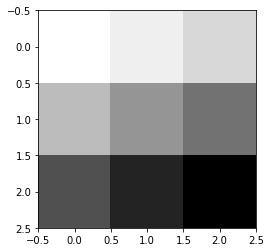

In [5]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


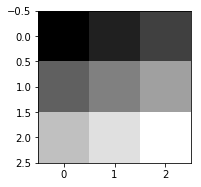

In [88]:
print("image.shape", image.shape)
weight=tf.constant([[[[1.]],[[1.]]],
                    [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d=tf.nn.conv2d(image,weight,strides=[1,1,1,1],padding='VALID')
#hmm why does it set strides to 1 1 1 1 ??? what does it mean?
conv2d_img=conv2d.eval()
weight2=tf.constant([[[[0.0625]],[[0.1875]],[[0.1875]],[[0.0625]]],
                    [[[0.1875]],[[0.5625]],[[0.5625]],[[0.1875]]],
                    [[[0.1875]],[[0.5625]],[[0.5625]],[[0.0625]]],
                    [[[0.0625]],[[0.1875]],[[0.1875]],[[0.0625]]]])
#weight2=tf.constant([[[[1.0]],[[1.0]],[[1.0]],[[1.0]]],
#                    [[[1.0]],[[1.0]],[[1.0]],[[1.0]]],
#                    [[[1.0]],[[1.0]],[[1.0]],[[1.0]]],
#                    [[[1.0]],[[1.0]],[[1.0]],[[1.0]]]])
print("conv2d_img.shape", conv2d_img.shape)
k=5
s=2
deconv2d=tf.nn.conv2d_transpose(image,weight2,[1,k,k,1],strides=[1,s,s,1],padding='SAME')
#deconv3d=tf.nn.conv2d_transpose(conv2d,weight2,[1,k,k,1],strides=[1,s,s,1],padding='SAME')

#this is show what is result.
conv2d_img = np.swapaxes(image, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

[[0.5625 0.9375 1.3125 1.6875 2.0625]
 [1.3125 2.     2.375  3.     3.25  ]
 [2.4375 3.5    4.     4.5    5.    ]
 [3.5625 5.     5.     6.     5.875 ]
 [4.6875 6.5    7.     7.5    8.    ]]
[[0.5625 0.9375 1.3125 1.6875 2.0625]
 [1.3125 2.     2.375  3.     3.25  ]
 [2.4375 3.5    4.     4.5    5.    ]
 [3.5625 5.     5.     6.     5.875 ]
 [4.6875 6.5    7.     7.5    8.    ]]


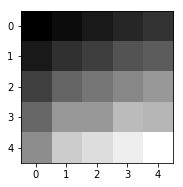

In [89]:
a=deconv2d.eval()
print(a.reshape([k,k]))
conv2d_img = np.swapaxes(a, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(k,k))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(k,k), cmap='gray')

for x in range(width):
            for y in range(height):
                value = (1 - abs(x / f - c)) * (1 - abs(y / f - c))
                bilinear[x, y] = value

In [150]:
width=4; height=4;      f = ceil(width/2.0);        c = (2 * f - 1 - f % 2) / (2.0 * f); bilinear = np.zeros([width, height])

In [182]:
w=tf.constant(np.ones([3,3]).reshape(3,3,1,1))
weight3=tf.constant([[[[1.0]],[[1.0]],[[1.0]]],
                    [[[1.0]],[[2.0]],[[1.0]]],
                    [[[1.0]],[[1.0]],[[1.0]]]])
k=7
s=4
deconv2d=tf.nn.conv2d_transpose(conv2d_img,weight3,[1,k,k,1],strides=[1,s,s,1],padding='SAME')
a=deconv2d.eval()
print(a.reshape([k,k]))

[[12. 12. 12.  0. 16. 16. 16.]
 [12. 24. 12.  0. 16. 32. 16.]
 [12. 12. 12.  0. 16. 16. 16.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [24. 24. 24.  0. 28. 28. 28.]
 [24. 48. 24.  0. 28. 56. 28.]
 [24. 24. 24.  0. 28. 28. 28.]]


In [168]:
conv2d_img.reshape(2,2)

array([[12., 16.],
       [24., 28.]], dtype=float32)

In [110]:
weight2.shape

TensorShape([Dimension(4), Dimension(4), Dimension(1), Dimension(1)])

In [155]:
weight2

<tf.Tensor 'Const_100:0' shape=(4, 4) dtype=float64>

In [167]:
b=tf.expand_dims(bilinear,2);

In [169]:
b=tf.expand_dims(b,0);

In [170]:
b.eval()

array([[[[0.0625],
         [0.1875],
         [0.1875],
         [0.0625]],

        [[0.1875],
         [0.5625],
         [0.5625],
         [0.1875]],

        [[0.1875],
         [0.5625],
         [0.5625],
         [0.1875]],

        [[0.0625],
         [0.1875],
         [0.1875],
         [0.0625]]]])

In [174]:
b.shaep

AttributeError: 'Tensor' object has no attribute 'shaep'

In [175]:
b.shape

TensorShape([Dimension(1), Dimension(4), Dimension(4), Dimension(1)])